In [16]:
import pandas as pd

df_outdoor = pd.read_csv('outdoor_train.csv')
df_indoor = pd.read_csv('indoor_train.csv')

In [17]:
df_outdoor.describe()

,RSS,distance
count,122218.000000,122218.000000
mean,-40.114852,5.540117
std,9.849507,2.859158
min,-79.000000,1.000000
25%,-47.000000,3.000000
50%,-40.000000,6.000000
75%,-33.000000,8.000000
max,-15.000000,10.000000


C:\Users\Rui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'RSS Distributions -- Indoor')

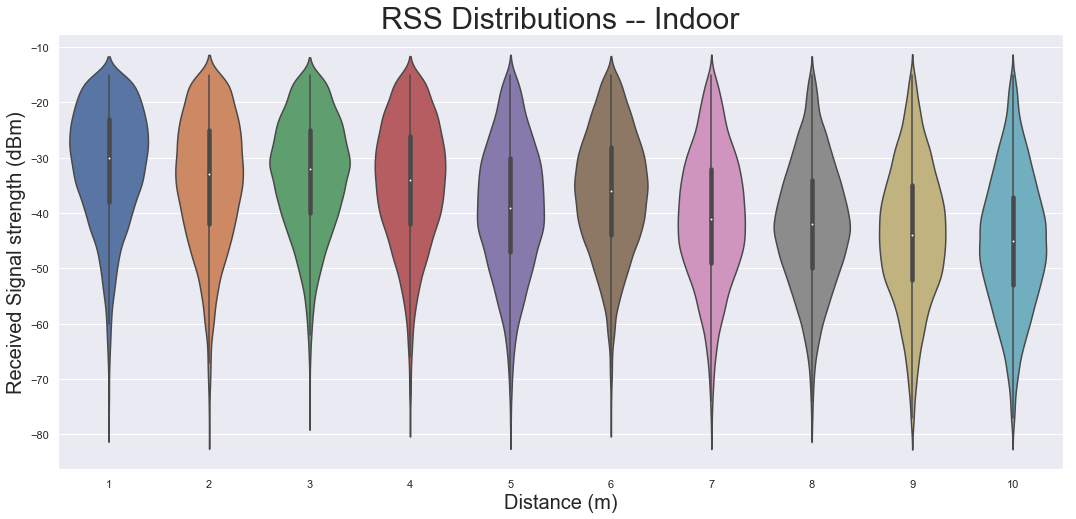

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn
# sns.violinplot(data=df['Signal strength (dBm)'])
plt.figure(figsize=(18, 8))
seaborn.set(font_scale=1)
# seaborn.set(style="whitegrid")
seaborn.set(style="darkgrid")
b = sns.violinplot(x= df_indoor['distance'], y = df_indoor['RSS'])
b.set_xlabel("Distance (m)",fontsize=20)
b.set_ylabel("Received Signal strength (dBm)",fontsize=20)
b.set_title("RSS Distributions -- Indoor", fontsize=30)

C:\Users\Rui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'RSS Distributions -- Outdoor')

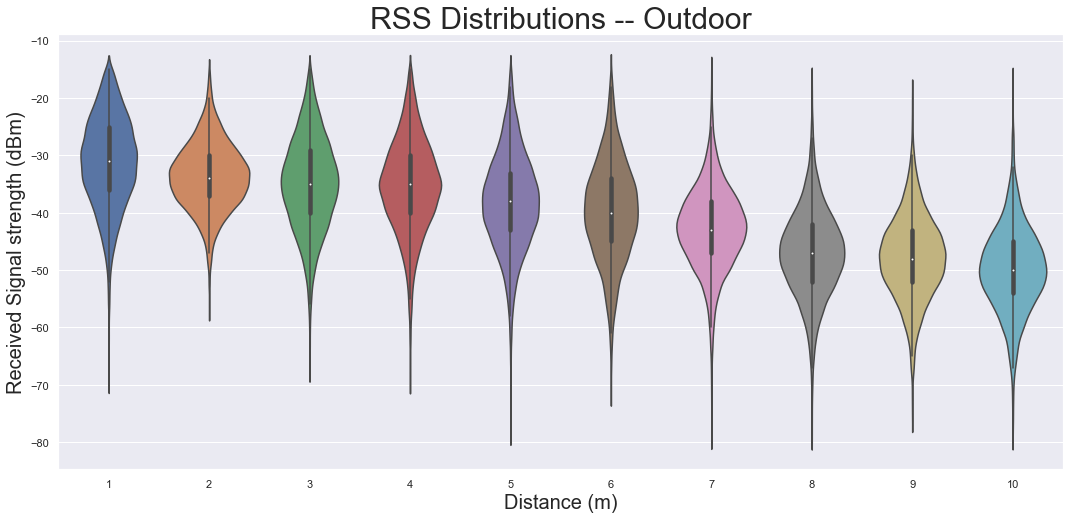

In [19]:
plt.figure(figsize=(18, 8))
seaborn.set(font_scale=1)
seaborn.set(style="darkgrid")
b = sns.violinplot(x= df_outdoor['distance'], y = df_outdoor['RSS'])
b.set_xlabel("Distance (m)",fontsize=20)
b.set_ylabel("Received Signal strength (dBm)",fontsize=20)
b.set_title("RSS Distributions -- Outdoor", fontsize=30)

In [20]:
df_indoor.groupby(['distance']).describe()

RSS                                                    
            count       mean        std   min   25%   50%   75%   max
distance                                                             
1         10519.0 -31.380264  10.575137 -78.0 -38.0 -30.0 -23.0 -15.0
2         11135.0 -34.266547  11.586139 -79.0 -42.0 -33.0 -25.0 -15.0
3         11960.0 -33.232692  10.332864 -76.0 -40.0 -32.0 -25.0 -15.0
4         12637.0 -34.533354  11.151100 -77.0 -42.0 -34.0 -26.0 -15.0
5         11775.0 -39.024968  11.762227 -79.0 -47.0 -39.0 -30.0 -15.0
6         10789.0 -36.399944  10.818253 -77.0 -44.0 -36.0 -28.0 -15.0
7         11617.0 -40.653181  11.805754 -79.0 -49.0 -41.0 -32.0 -15.0
8         13022.0 -42.185839  11.207280 -78.0 -50.0 -42.0 -34.0 -15.0
9         12435.0 -43.750141  12.256227 -79.0 -52.0 -44.0 -35.0 -15.0
10        12921.0 -45.115316  12.165144 -79.0 -53.0 -45.0 -37.0 -15.0

In [21]:
df_outdoor.groupby(['distance']).describe()

RSS                                                   
            count       mean       std   min   25%   50%   75%   max
distance                                                            
1         11497.0 -31.182917  7.885049 -69.0 -36.0 -31.0 -25.0 -15.0
2         12287.0 -33.609425  5.831389 -57.0 -37.0 -34.0 -30.0 -15.0
3         12358.0 -34.955413  8.105651 -67.0 -40.0 -35.0 -29.0 -15.0
4         11210.0 -35.290366  8.063070 -69.0 -40.0 -35.0 -30.0 -15.0
5         13664.0 -38.065647  8.322307 -78.0 -43.0 -38.0 -33.0 -15.0
6         11744.0 -39.676260  8.618620 -71.0 -45.0 -40.0 -34.0 -15.0
7         12400.0 -42.734435  7.174574 -79.0 -47.0 -43.0 -38.0 -15.0
8         12602.0 -47.047532  7.571150 -79.0 -52.0 -47.0 -42.0 -17.0
9         11843.0 -47.803175  7.279160 -76.0 -52.0 -48.0 -43.0 -19.0
10        12613.0 -49.844129  7.478585 -79.0 -54.0 -50.0 -45.0 -17.0

In [22]:
df_outdoor.groupby(['distance']).describe().to_clipboard()

In [23]:
# modeling
import numpy as np
import random
from scipy.special import erfinv
import pandas as pd
import pandas
from sklearn.neighbors import KNeighborsClassifier
import random
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from warnings import simplefilter
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score
import sklearn.model_selection
from pykalman import KalmanFilter
from sklearn.metrics import r2_score
from sklearn.metrics import *

In [72]:
# use linear regression to predict and show the performance
def train_model(df):
    df = shuffle(df)

    x = df.drop(['distance'],axis=1).values
    y = df['distance'].values

    split_point = int(len(x) * 0.9)
    X_train = x[:split_point]
    y_train = y[:split_point]
    X_test = x[split_point:]
    y_test = y[split_point:]
    assert len(X_train) == len(y_train)
    assert len(X_test) == len(y_test)
    
    # train a classifier
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # predict the test set
    predictions = lr.predict(X_test)
    predictions_round = [int(round(p)) for p in predictions]
    print("accuracy:", accuracy_score(y_test, predictions_round))
    print("mean_squared_error:", mean_squared_error(y_test, predictions))
    print("Coefficient of determination(R2):", r2_score(y_test, predictions))
    print("explained_variance_score:",explained_variance_score(y_test, predictions, multioutput='uniform_average'))

In [73]:
train_model(df_indoor)

accuracy: 0.10950256712397946
mean_squared_error: 7.118149199127274
Coefficient of determination(R2): 0.13151655184874245
explained_variance_score: 0.13166265899956342


In [26]:
# !compare the model


# ignore all future warnings


def compare_model(df):
    x = df.drop('distance', axis=1).values
    y = df['distance'].values
    simplefilter(action='ignore', category=FutureWarning)

    classifiers = [KNeighborsClassifier(),
                   DecisionTreeClassifier(),
                   LinearDiscriminantAnalysis(),
                   LogisticRegression(),
                   GaussianNB(),
                   SVC(),
                  LinearRegression()]

    classifier_accuracy_list = []
    for i, classifier in enumerate(classifiers):
        # split the dataset into 5 folds; then test the classifier against each fold one by one
        accuracies = cross_val_score(classifier, x, y, cv=5)
        classifier_accuracy_list.append((accuracies.mean(), type(classifier).__name__))

    # sort the classifiers
    classifier_accuracy_list = sorted(classifier_accuracy_list, reverse=True)
    for item in classifier_accuracy_list:
        print(item[1], ':', item[0])

In [27]:
compare_model(df_indoor[:10000])

GaussianNB : 0.3736953978953979
LogisticRegression : 0.3717931962931963
LinearDiscriminantAnalysis : 0.3705908953908954
DecisionTreeClassifier : 0.3678982945982946
SVC : 0.36699749379749386
KNeighborsClassifier : 0.29959664019664023
LinearRegression : -23.286463931362505


In [28]:
# =========================== compare models ==============================


In [29]:

# compare the std

def compare_model_2(df):
    x = df.drop('distance', axis=1).values
    y = df['distance'].values
    simplefilter(action='ignore', category=FutureWarning)

    classifiers = [KNeighborsClassifier(),
                   DecisionTreeClassifier(),
                   LinearDiscriminantAnalysis(),
                   LogisticRegression(),
                   GaussianNB(),
                   SVC(),
                  LinearRegression()]

    classifier_accuracy_list = []
    for i, classifier in enumerate(classifiers):
#         loo = sklearn.model_selection.LeaveOneOut(len(y))
        # split the dataset into 5 folds; then test the classifier against each fold one by one
        accuracies = cross_val_score(classifier, x, y, scoring='neg_mean_squared_error', cv=3)
        classifier_accuracy_list.append((accuracies.mean(), type(classifier).__name__))
 
    # sort the classifiers
    classifier_accuracy_list = sorted(classifier_accuracy_list, reverse=True)
    for item in classifier_accuracy_list:
        print(item[1], ':', item[0])

In [30]:
compare_model(df_indoor[:10000])

GaussianNB : 0.3736953978953979
LogisticRegression : 0.3717931962931963
LinearDiscriminantAnalysis : 0.3705908953908954
DecisionTreeClassifier : 0.3678982945982946
SVC : 0.36699749379749386
KNeighborsClassifier : 0.29959664019664023
LinearRegression : -23.286463931362505


In [31]:
compare_model_2(df_indoor[:10000])

GaussianNB : -14.361704189774288
SVC : -14.661261445189952
DecisionTreeClassifier : -14.716242225744528
LinearDiscriminantAnalysis : -15.340973882054321
KNeighborsClassifier : -15.876741638467024
LogisticRegression : -16.12216830343415
LinearRegression : -17.049048662373977


In [32]:
compare_model(df_outdoor[:10000])

GaussianNB : 0.541597161767697
LinearDiscriminantAnalysis : 0.5400974608682962
SVC : 0.5393993098447325
DecisionTreeClassifier : 0.5388990597196701
LogisticRegression : 0.5317992070960555
KNeighborsClassifier : 0.47990769035866593
LinearRegression : -15.013587644877328


In [33]:
compare_model_2(df_outdoor[:10000])

LinearDiscriminantAnalysis : -8.877448950099732
GaussianNB : -9.553691547992152
KNeighborsClassifier : -9.80095479931949
SVC : -9.901509958505061
DecisionTreeClassifier : -9.901509958505061
LogisticRegression : -11.613989453933506
LinearRegression : -20.151621059297927


In [34]:

# # from sklearn.metrics import max_error


def train(df):
    df = shuffle(df)

    x = df.drop(['distance'],axis=1).values
    y = df['distance'].values

    split_point = int(len(x) * 0.9)
    X_train = x[:split_point]
    y_train = y[:split_point]
    X_test = x[split_point:]
    y_test = y[split_point:]
    assert len(X_train) == len(y_train)
    assert len(X_test) == len(y_test)

    # train a classifier
#     regr = LinearRegression()
#     regr.fit(X_train, y_train)
    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    # predict the test set
#     predictions = regr.predict(X_test)
    print("accuracy:", accuracy_score(y_test, predictions))
    print("mean_squared_error:", mean_squared_error(y_test, predictions))
    print("Coefficient of determination(R2):", r2_score(y_test, predictions))
    print("explained_variance_score:",explained_variance_score(y_test, predictions, multioutput='uniform_average'))
#     print("coefficiency:",regr.coef_)



In [35]:
from sklearn.neural_network import MLPClassifier
train(df_indoor) # deep learning 

accuracy: 0.11152259910781921
mean_squared_error: 13.77123137783015
Coefficient of determination(R2): -0.6691487060519652
explained_variance_score: 0.0


In [36]:
train(df_outdoor) # deep learning 

accuracy: 0.1111111111111111
mean_squared_error: 8.469153984617902
Coefficient of determination(R2): -0.032474163589234495
explained_variance_score: 0.0


In [37]:
compare_model_2(df_indoor[:10000]) # mse compare

GaussianNB : -14.361704189774288
SVC : -14.661261445189952
DecisionTreeClassifier : -14.716242225744528
LinearDiscriminantAnalysis : -15.340973882054321
KNeighborsClassifier : -15.876741638467024
LogisticRegression : -16.12216830343415
LinearRegression : -17.049048662373977


In [38]:
compare_model_2(df_outdoor[:10000]) # mse compare

LinearDiscriminantAnalysis : -8.877448950099732
GaussianNB : -9.553691547992152
KNeighborsClassifier : -9.80095479931949
SVC : -9.901509958505061
DecisionTreeClassifier : -9.901509958505061
LogisticRegression : -11.613989453933506
LinearRegression : -20.151621059297927


In [79]:
train_model(df_indoor[:10000]) # linear

accuracy: 0.157
mean_squared_error: 9.856865100951797
Coefficient of determination(R2): 0.12255853034404529
explained_variance_score: 0.12262885807775359


In [74]:
train_model(df_outdoor) # linear

accuracy: 0.1466208476517755
mean_squared_error: 5.022716116965425
Coefficient of determination(R2): 0.38474292318984615
explained_variance_score: 0.3847435161684828


In [80]:
train_model(df_indoor) # linear

accuracy: 0.10840838313273293
mean_squared_error: 7.140144632313224
Coefficient of determination(R2): 0.12437034092523924
explained_variance_score: 0.12449523666739004
